# Instantaneous visualization of turbine case

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/ascldap/users/lcheung/wind_uq/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil
for x in amrwindfedirs: sys.path.insert(1, x)

import postproamrwindsample_xarray as ppsamplexr
import numpy as np
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Hub-height plane

In [2]:
amrdir   = '/lustre/orion/cfd162/proj-shared/lcheung/AWAKEN/Neutral/5kmX5km_turbine1/post_processing/'
hhncfile = 'turbhh_41000.nc'  # netcdf filename
iters    = [1000]         # timesteps to extract
varnames = ['velocityx', 'velocityy', 'velocityz']  # variables to extract
hhdb     = ppsamplexr.getPlaneXR(amrdir+'/'+hhncfile, iters, varnames, verbose=1, gettimes=True)

extracting iter 1000


(730.0, 4540.0, 2052.0, 3068.0)

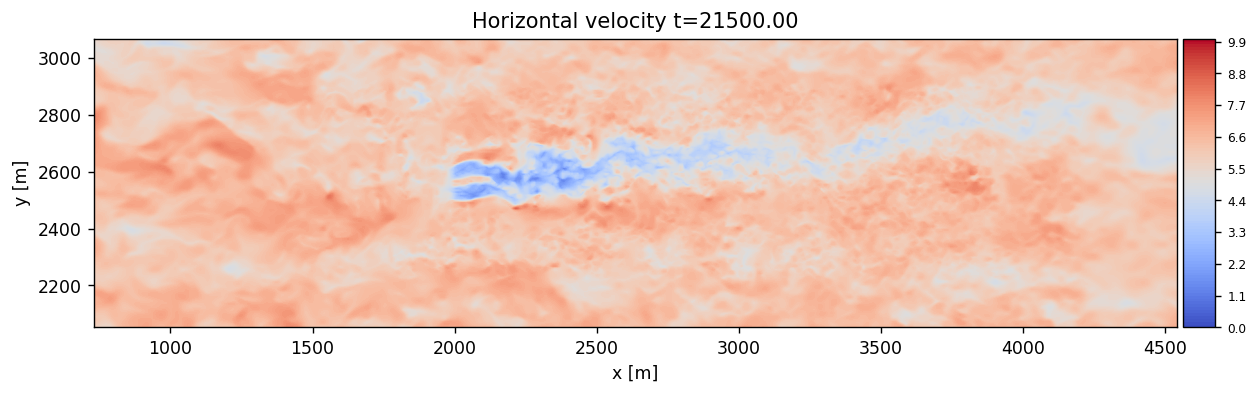

In [3]:
fig, ax = plt.subplots(1,1,figsize=(12,3), dpi=125)
clevels=np.linspace(0, 10,101)
iplane= 0
iter  = 1000
Uh=np.sqrt(hhdb['velocityx'][iter][iplane,:,:]**2+hhdb['velocityy'][iter][iplane,:,:]**2)
c=plt.contourf(hhdb['x'][iplane,:,:], hhdb['y'][iplane,:,:], Uh, levels=clevels, cmap='coolwarm')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
cbar=fig.colorbar(c, ax=ax, cax=cax)
cbar.ax.tick_params(labelsize=7)

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('Horizontal velocity t=%0.2f'%hhdb['times'][0])
ax.axis('scaled')

In [4]:
# Save plane to pickle file
X1, Y1  = hhdb['x'][iplane,:,:], hhdb['y'][iplane,:,:]
U, V, W = hhdb['velocityx'][iter][iplane,:,:], hhdb['velocityy'][iter][iplane,:,:], hhdb['velocityz'][iter][iplane,:,:]
dbfile = open('pklfiles/AMRWIND_HH_instVEL.pkl', 'wb')
pickle.dump({'X':X1, 'Y':Y1, 'U':U, 'V':V, 'W':W, }, dbfile, protocol=2)
dbfile.close()

## Rotor plane

In [5]:
RPncfile = 'rotor_41000.nc'  # netcdf filename
iters    = [1000]         # timesteps to extract
varnames = ['velocityx', 'velocityy']  # variables to extract
RPdb     = ppsamplexr.getPlaneXR(amrdir+'/'+RPncfile, iters, varnames, verbose=1, gettimes=True)

extracting iter 1000


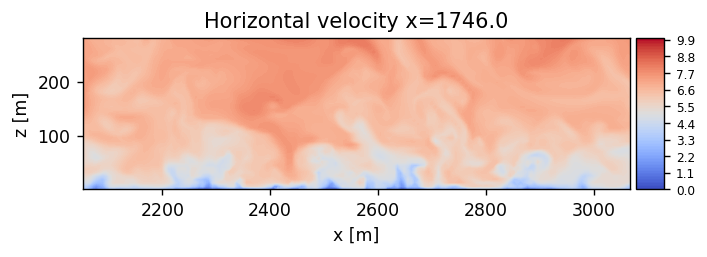

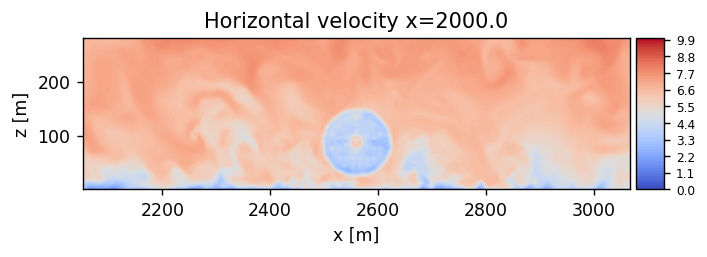

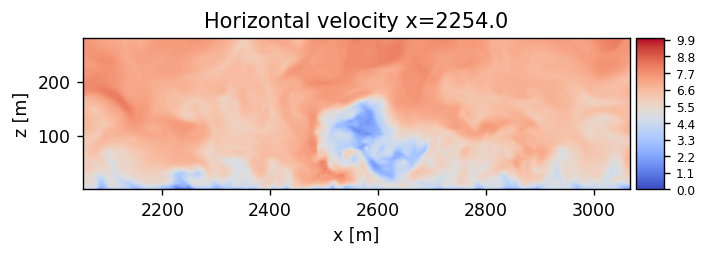

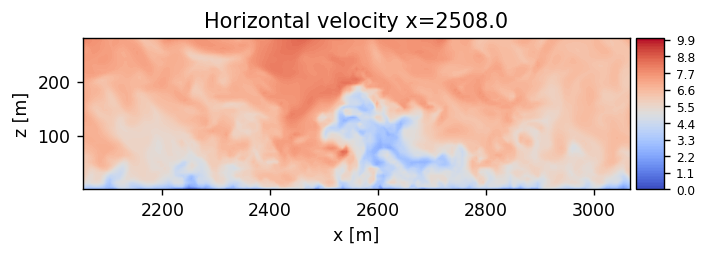

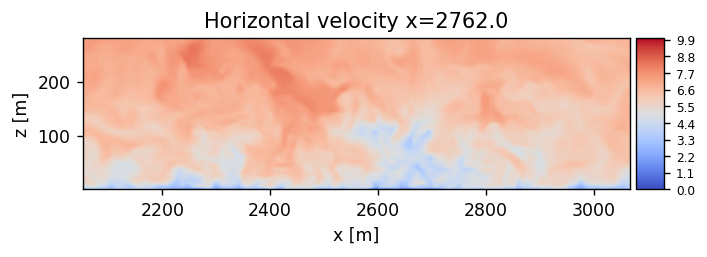

In [6]:
plotplanes = [4, 5, 6, 7,8]
for iplane in plotplanes:
    fig, ax = plt.subplots(1,1,figsize=(6,3), dpi=125)
    clevels=np.linspace(0, 10,101)
    iter  = 1000
    Uh=np.sqrt(RPdb['velocityx'][iter][iplane,:,:]**2+RPdb['velocityy'][iter][iplane,:,:]**2)
    c=plt.contourf(RPdb['y'][iplane,:,:], RPdb['z'][iplane,:,:], Uh, levels=clevels, cmap='coolwarm')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar=fig.colorbar(c, ax=ax, cax=cax)
    cbar.ax.tick_params(labelsize=7)

    #plt.colorbar()
    ax.axis('scaled')
    ax.set_xlabel('x [m]')
    ax.set_ylabel('z [m]')
    ax.set_title('Horizontal velocity x=%0.1f'%np.mean(RPdb['x'][iplane,:,:]))

## Streamwise plane

In [7]:
SWncfile = 'wakesw_41000.nc'  # netcdf filename
iters    = [1000]         # timesteps to extract
varnames = ['velocityx', 'velocityy']  # variables to extract
SWdb     = ppsamplexr.getPlaneXR(amrdir+'/'+SWncfile, iters, varnames, verbose=1, gettimes=True)

extracting iter 1000


(735.8468280736829, 4528.306343852634, 0.08400000000000318, 280.5)

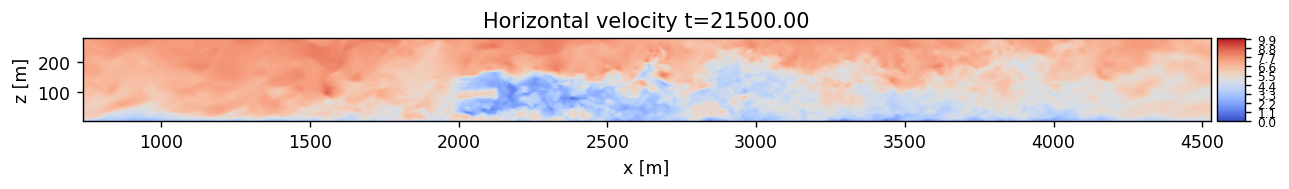

In [8]:
fig, ax = plt.subplots(1,1,figsize=(12,3), dpi=125)
clevels=np.linspace(0, 10,101)
iplane= 0
iter  = 1000
Uh=np.sqrt(SWdb['velocityx'][iter][iplane,:,:]**2+SWdb['velocityy'][iter][iplane,:,:]**2)
c=plt.contourf(SWdb['x'][iplane,:,:], SWdb['z'][iplane,:,:], Uh, levels=clevels, cmap='coolwarm')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2.5%", pad=0.05)
cbar=fig.colorbar(c, ax=ax, cax=cax)
cbar.ax.tick_params(labelsize=7)

ax.set_xlabel('x [m]')
ax.set_ylabel('z [m]')
ax.set_title('Horizontal velocity t=%0.2f'%SWdb['times'][0])
ax.axis('scaled')